<a href="https://colab.research.google.com/github/DhruvM09/DsaProject/blob/main/applying_ML_algorithms/Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern
from skimage.feature import hog
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler


Loading CNN dataset


In [2]:
url_filtered_CNN_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_CNN_features_dataset.csv' #for CNN limited
df_CNN = pd.read_csv(url_filtered_CNN_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv
df_CNN.drop('Unnamed: 0', axis=1, inplace=True)
df_CNN

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,2048
0,0.266585,1.337187,1.352905,0.100848,1.880685,0.059888,2.773605,0.115643,0.138749,0.056121,...,0.039434,0.071662,0.733759,1.643910,0.041306,1.488236,0.048181,0.247783,0.300232,Paul_Bremer
1,0.355948,0.750634,0.909794,0.188214,0.680066,0.221442,3.089571,0.342022,0.087186,0.234741,...,0.093867,0.089694,0.859610,1.764073,0.250430,1.133540,0.004091,0.153542,0.236034,Paul_Bremer
2,0.267111,1.015316,1.154480,0.131544,1.066389,0.024949,3.701925,0.145037,0.082419,0.253356,...,0.080086,0.089589,0.663708,1.854499,0.078751,1.240009,0.065222,0.105058,0.227633,Paul_Bremer
3,0.260295,0.882900,0.885955,0.106698,2.663052,0.057836,1.854394,0.209269,0.103750,0.149302,...,0.181255,0.182038,0.397535,1.222931,0.007285,0.878194,0.016247,0.110492,0.129523,Paul_Bremer
4,0.347203,0.623839,0.817085,0.212599,1.026321,0.176634,2.486715,0.426571,0.345026,0.375072,...,0.267895,0.136346,0.713298,0.978184,0.059828,1.008205,0.042905,0.028597,0.199120,Paul_Bremer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,0.110671,0.933532,1.576373,0.047225,0.697608,0.100375,2.509764,0.342827,0.115562,1.093016,...,0.161235,0.646160,0.615094,1.555704,0.093572,0.744401,0.186377,0.036658,0.164960,Charles_Moose
4320,0.250879,1.126343,0.961169,0.032000,0.247225,0.064331,2.297021,0.689515,0.502984,0.706359,...,0.322805,0.402172,0.624546,1.822085,0.377166,0.638106,0.105163,0.089668,0.067495,Charles_Moose
4321,0.101699,1.497757,0.805623,0.210569,1.158021,0.287555,1.315162,0.545735,0.269730,0.630467,...,0.252010,0.129211,1.347581,1.599726,0.049081,2.030167,0.162992,0.033966,0.037959,Charles_Moose
4322,0.108061,0.696727,1.336171,0.016554,0.625865,0.380914,2.106623,0.466441,0.081740,1.208193,...,0.168940,0.217983,0.425700,1.362742,0.245273,0.682824,0.271875,0.023275,0.111986,Charles_Moose


In [3]:
# Separate features and labels
X = df_CNN.iloc[:, :-1]
y = df_CNN.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_CNN, X_test_CNN, y_train_CNN, y_test_CNN = train_test_split(X, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_CNN = scaler.fit_transform(X_train_CNN)
X_test_CNN = scaler.transform(X_test_CNN)

print(f"Dataset size: {df_CNN.shape}")
print(f"Training size: {X_train_CNN.shape}, Testing size: {X_test_CNN.shape}")

Dataset size: (4324, 2049)
Training size: (3459, 2048), Testing size: (865, 2048)


Loading LBP dataset


In [4]:
url_filtered_LBP_features_dataset = 'https://raw.githubusercontent.com/AgarwalMayank2/Face_Detection/refs/heads/main/processed_dataset/filtered_LBP_features_dataset.csv' #for CNN limited
df_LBP = pd.read_csv(url_filtered_LBP_features_dataset) # reading url for extracted CNN_features_dataset_limited.csv
df_LBP.drop('Unnamed: 0', axis=1, inplace=True)
df_LBP

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,589.0,57.0,319.0,205.0,67.0,4.0,195.0,466.0,370.0,32.0,...,474.0,1924.0,612.0,26.0,357.0,592.0,523.0,328.0,6088.0,Tim_Henman
1,1012.0,113.0,383.0,203.0,76.0,11.0,205.0,369.0,505.0,59.0,...,591.0,2086.0,681.0,29.0,447.0,699.0,535.0,486.0,13472.0,Tim_Henman
2,920.0,92.0,288.0,152.0,107.0,18.0,192.0,403.0,313.0,39.0,...,461.0,1812.0,579.0,41.0,428.0,597.0,411.0,374.0,11673.0,Tim_Henman
3,1068.0,85.0,447.0,298.0,90.0,11.0,293.0,732.0,546.0,53.0,...,727.0,2150.0,650.0,32.0,374.0,564.0,585.0,367.0,5449.0,Tim_Henman
4,510.0,43.0,304.0,189.0,47.0,8.0,201.0,387.0,296.0,18.0,...,405.0,3263.0,588.0,36.0,307.0,593.0,350.0,328.0,4606.0,Tim_Henman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4319,706.0,56.0,472.0,226.0,85.0,6.0,268.0,461.0,325.0,31.0,...,539.0,1579.0,513.0,27.0,340.0,430.0,537.0,305.0,9133.0,Pervez_Musharraf
4320,1459.0,118.0,656.0,379.0,130.0,10.0,406.0,572.0,647.0,45.0,...,728.0,1208.0,689.0,30.0,374.0,669.0,864.0,332.0,8567.0,Pervez_Musharraf
4321,907.0,103.0,441.0,375.0,104.0,12.0,394.0,887.0,390.0,51.0,...,536.0,3389.0,619.0,29.0,356.0,656.0,579.0,353.0,4020.0,Pervez_Musharraf
4322,525.0,44.0,277.0,194.0,49.0,4.0,246.0,456.0,361.0,32.0,...,664.0,2049.0,779.0,31.0,643.0,656.0,469.0,515.0,11051.0,Pervez_Musharraf


In [5]:
# Separate features and labels
X = df_LBP.iloc[:, :-1]
y = df_LBP.iloc[:, -1]

# Encode labels (alphabetically)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
# encoding is benificial as working on numbers is lot easier than working on string

# Ensure stratified split (16 training, 4 testing per class)
X_train_LBP, X_test_LBP, y_train_LBP, y_test_LBP = train_test_split(X, y_encoded, test_size=1/5, random_state=42, stratify=y_encoded)

# Normalize features
scaler = StandardScaler()
X_train_LBP = scaler.fit_transform(X_train_LBP)
X_test_LBP = scaler.transform(X_test_LBP)

print(f"Dataset size: {df_LBP.shape}")
print(f"Training size: {X_train_LBP.shape}, Testing size: {X_test_LBP.shape}")

Dataset size: (4324, 257)
Training size: (3459, 256), Testing size: (865, 256)


Parameters

In [6]:
#parameters
LBP_RADIUS = 1
LBP_POINTS = 8 * LBP_RADIUS
HOG_PIXELS_PER_CELL = (8, 8)
HOG_CELLS_PER_BLOCK = (2, 2)
HOG_ORIENTATIONS = 9
IMG_SIZE = (64, 64)

RUNNING FOR CNN DATA

In [7]:
# Varying n_estimators and plotting accuracy
n_estimators_range = [10, 50, 100, 200, 300]
train_accuracies = []
test_accuracies = []
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_CNN, y_train_CNN)

    train_acc = accuracy_score(y_train_CNN, rf.predict(X_train_CNN))
    test_acc = accuracy_score(y_test_CNN, rf.predict(X_test_CNN))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

    print(f'n_estimators={n}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

n_estimators=10, Train Accuracy: 0.9954, Test Accuracy: 0.1827
n_estimators=50, Train Accuracy: 1.0000, Test Accuracy: 0.2728
n_estimators=100, Train Accuracy: 1.0000, Test Accuracy: 0.2936
n_estimators=200, Train Accuracy: 1.0000, Test Accuracy: 0.2867
n_estimators=300, Train Accuracy: 1.0000, Test Accuracy: 0.2879


CNN PLOT

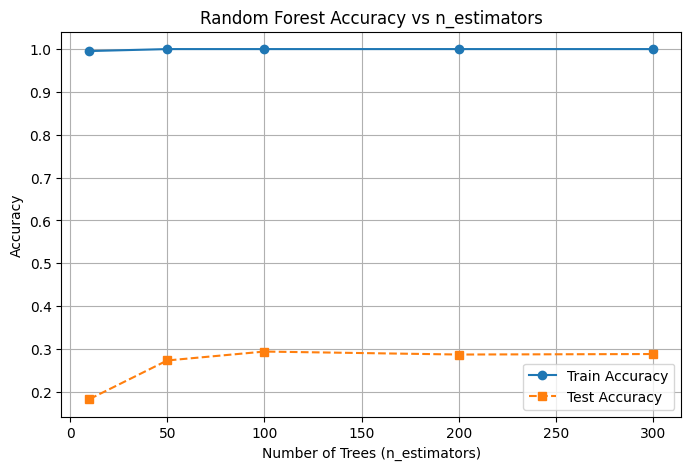

In [8]:
# Plot train vs test accuracy
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_accuracies, marker='o', label='Train Accuracy', linestyle='-')
plt.plot(n_estimators_range, test_accuracies, marker='s', label='Test Accuracy', linestyle='--')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs n_estimators')
plt.legend()
plt.grid(True)
plt.show()

RUNNING FOR LBP DATA

In [9]:
# Varying n_estimators and plotting accuracy
n_estimators_range = [10, 50, 100, 200, 300]
train_accuracies_lbp = []
test_accuracies_lbp = []
for n in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train_LBP, y_train_LBP)

    train_acc = accuracy_score(y_train_LBP, rf.predict(X_train_LBP))
    test_acc = accuracy_score(y_test_LBP, rf.predict(X_test_LBP))

    train_accuracies_lbp.append(train_acc)
    test_accuracies_lbp.append(test_acc)

    print(f'n_estimators={n}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

n_estimators=10, Train Accuracy: 0.9965, Test Accuracy: 0.0786
n_estimators=50, Train Accuracy: 1.0000, Test Accuracy: 0.1329
n_estimators=100, Train Accuracy: 1.0000, Test Accuracy: 0.1422
n_estimators=200, Train Accuracy: 1.0000, Test Accuracy: 0.1491
n_estimators=300, Train Accuracy: 1.0000, Test Accuracy: 0.1561


LBP PLOT

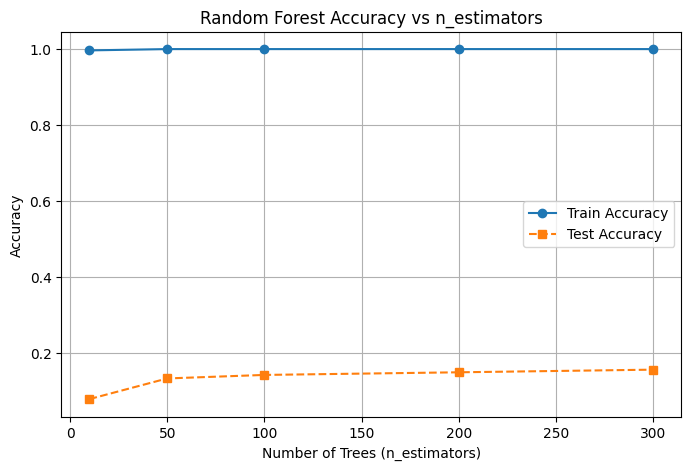

In [10]:
# Plot train vs test accuracy
plt.figure(figsize=(8, 5))
plt.plot(n_estimators_range, train_accuracies_lbp, marker='o', label='Train Accuracy', linestyle='-')
plt.plot(n_estimators_range, test_accuracies_lbp, marker='s', label='Test Accuracy', linestyle='--')
plt.xlabel('Number of Trees (n_estimators)')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy vs n_estimators')
plt.legend()
plt.grid(True)
plt.show()